# Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

# ML
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
df = pd.read_csv('/content/full_data.csv')

# Informações dos Dados

In [ ]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3128,Female,8.0,0,0,No,children,Rural,67.84,24.0,Unknown,0


In [ ]:
print('Data Size:',df.shape)
print('Duplicated:',df.duplicated().sum())
info_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null': df.isna().sum() / len(df) *100,
    'Type': df.dtypes.values
})
info_data

Data Size: (4981, 11)
Duplicated: 0


,Unique,Null,Type
gender,2,0.0,object
age,104,0.0,float64
hypertension,2,0.0,int64
heart_disease,2,0.0,int64
ever_married,2,0.0,object
work_type,4,0.0,object
Residence_type,2,0.0,object
avg_glucose_level,3895,0.0,float64
bmi,342,0.0,float64
smoking_status,4,0.0,object


# Gráfico dos dados

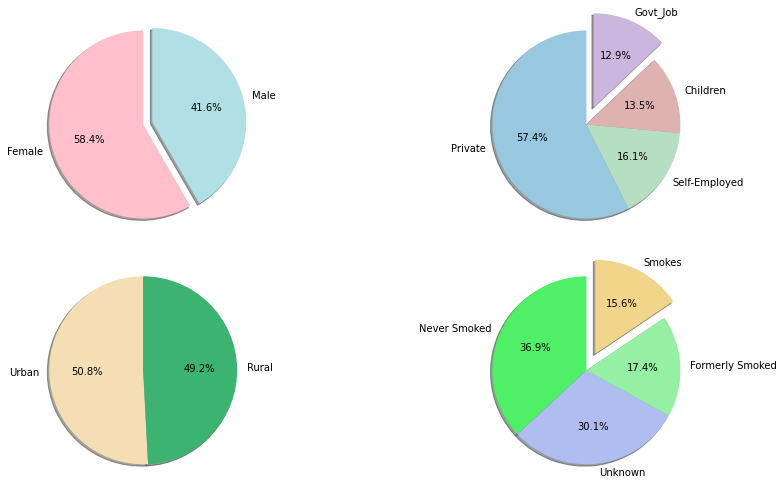

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(14,7))

gender = df['gender'].value_counts()
names = ['Female','Male']
color = ['#FFC0CB','#B0E0E6']
explode = (0,0.1)
ax[0][0].pie(gender, labels=names, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=color)

# Work type

value_work = df['work_type'].value_counts()
name_work = ['Private','Self-Employed','Children','Govt_Job']
color = ['#97C8DF','#B6DEC3','#DEB2B1','#CBB6DE']
explode = (0,0,0,0.2)
ax[0][1].pie(value_work, labels=name_work, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=color)

# Residence
residence = df['Residence_type'].value_counts()
name_residence = ['Urban','Rural']
explode = (0,0)
color = ['#F5DEB3','#3CB371']
ax[1][0].pie(residence, labels=name_residence, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=color)


## smoking
color = ['#4FF067','#AFBDF0','#96F0A3','#F0D58B']
smoke = df['smoking_status'].value_counts()
name_smoke = ['Never Smoked','Unknown','Formerly Smoked','Smokes']
explode = (0,0,0,0.2)
ax[1][1].pie(smoke, labels=name_smoke, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = color)

plt.tight_layout()
plt.show()

- Maior parte dos dados é composto por mulheres, empresas privadas, e pessoas que nunca fumaram ou é desconhecida. Vamos ver no gráfico de histograma a situação dos dados numéricos.

## Analisando dados numéricos

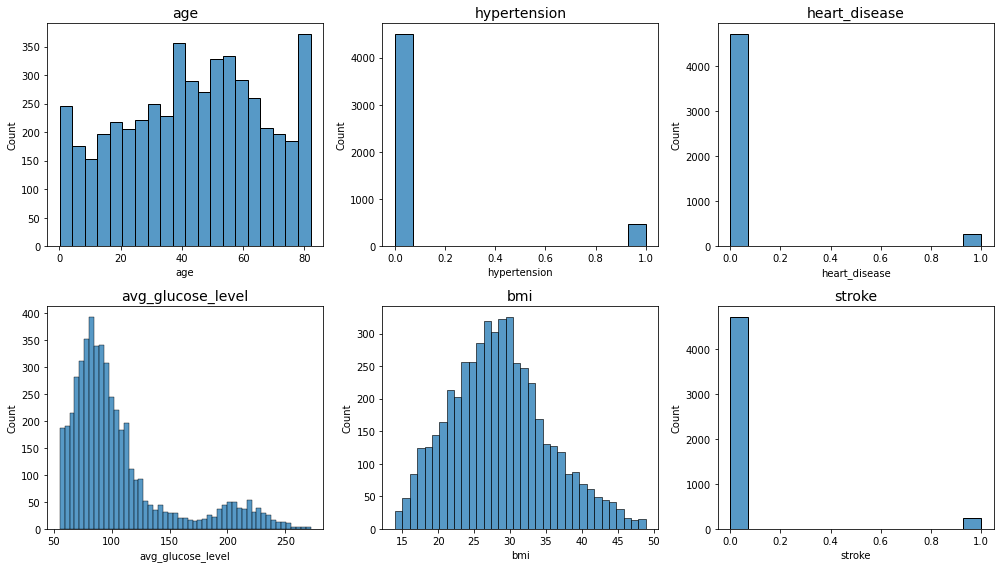

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(14,8))
for i, col in enumerate(num.columns):
  ax = plt.subplot(2,3, i + 1)
  sns.histplot(x=num[col], ax=ax)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

- Observando os dados, vemos logo de cara os dados desequilibrados, nas colunas 'Stroke','Heart Disease' e 'Hypertension', que podem mudar a forma do resultado que esperamos nos modelos de classificação. 

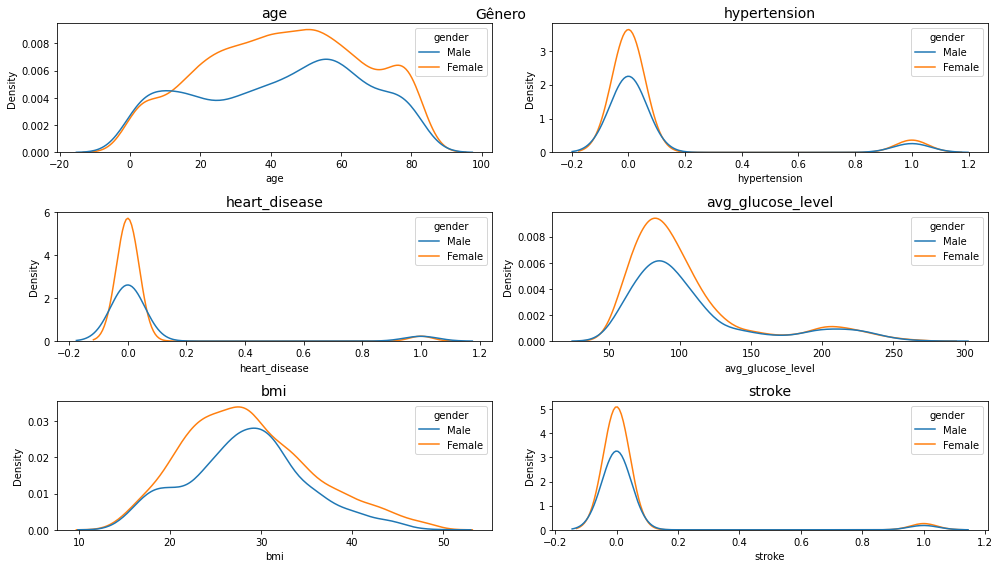

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(14,8))
for i, col in enumerate(num.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.kdeplot(x=num[col], hue=df['gender'], ax=ax)
  plt.suptitle('Gênero', fontsize=14)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

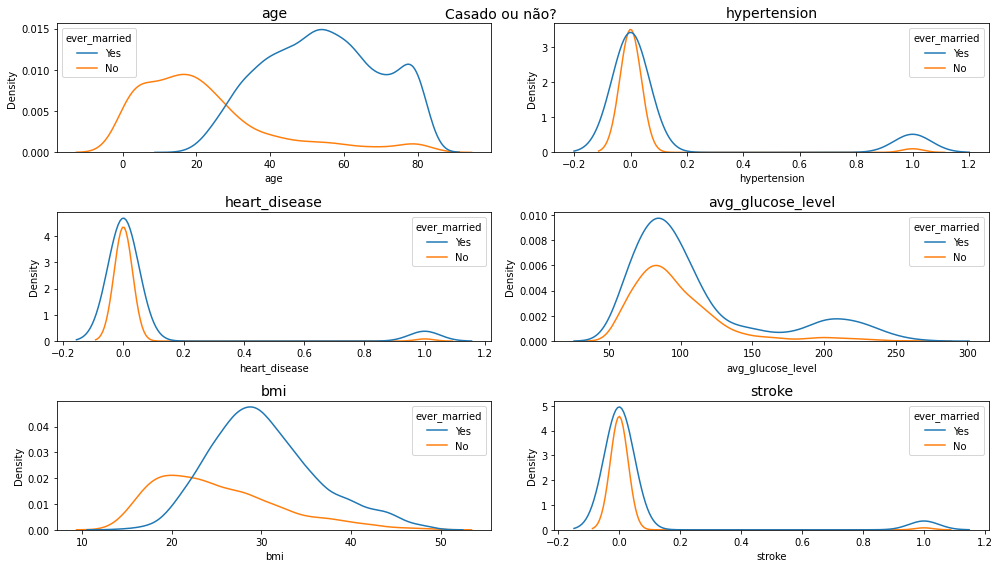

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(14,8))
for i, col in enumerate(num.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.kdeplot(x=num[col], hue=df['ever_married'], ax=ax)
  plt.suptitle('Casado ou não?', fontsize=14)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

- Como é a distribuição de idade, hipertensão e bmi das pessoas casadas. 

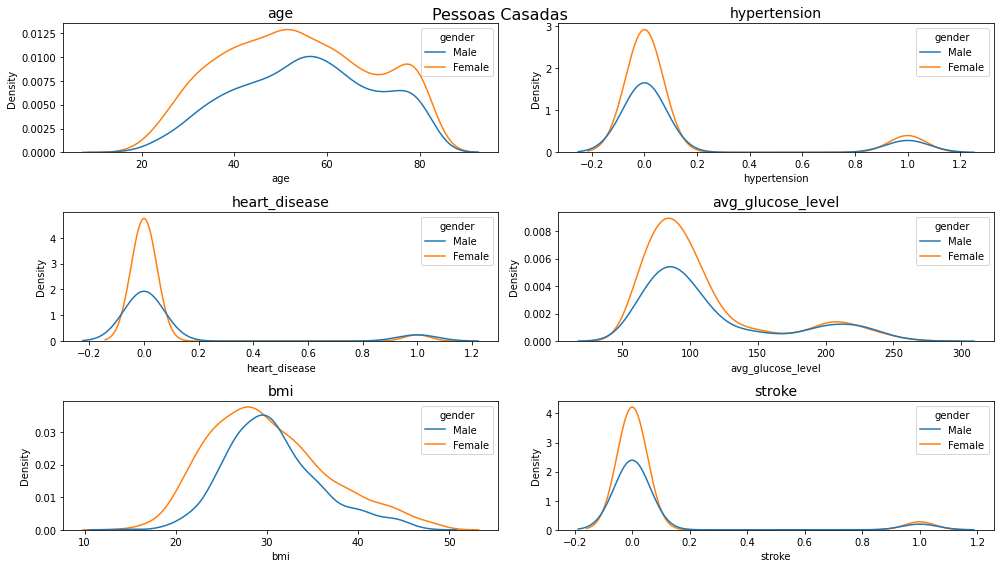

In [ ]:
plt.figure(figsize=(14,8))
for i, col in enumerate(num.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.kdeplot(x=num[col], hue='gender', data=df[df['ever_married'] == 'Yes'],ax=ax)
  plt.suptitle('Pessoas Casadas', fontsize=16)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

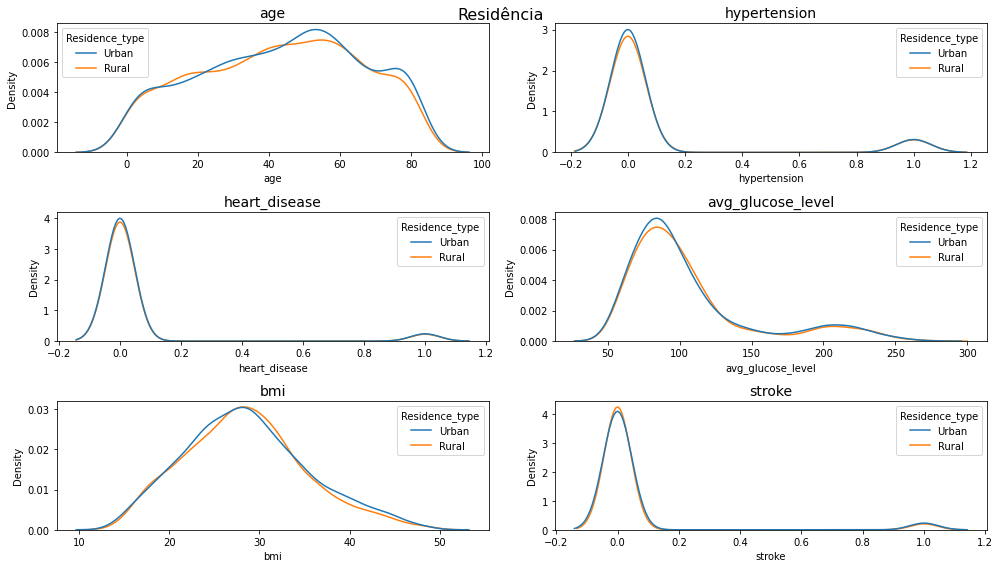

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(14,8))
for i, col in enumerate(num.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.kdeplot(x=num[col], hue=df['Residence_type'], ax=ax)
  plt.suptitle('Residência', fontsize=16)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

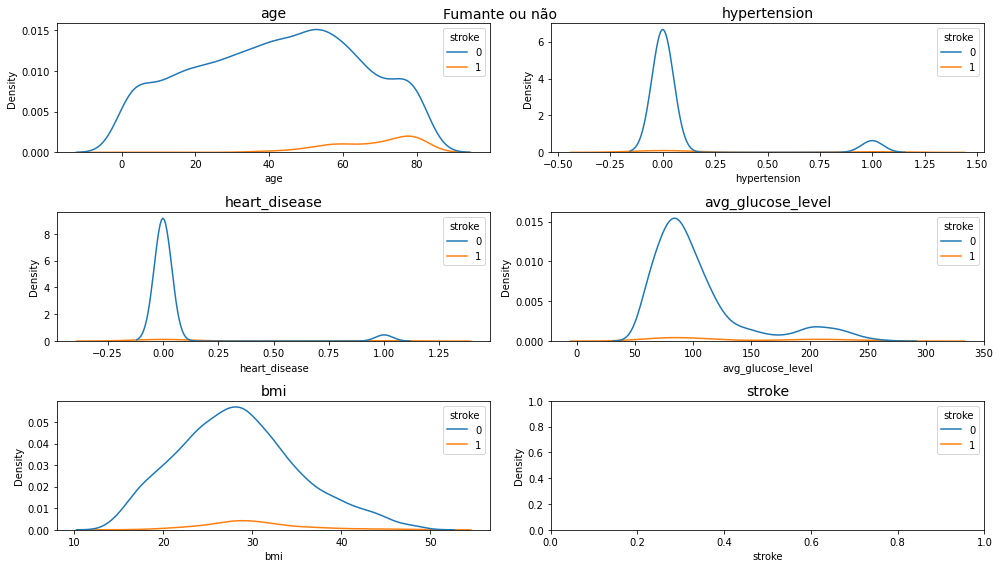

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(14,8))
for i, col in enumerate(num.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.kdeplot(x=num[col], hue=df['stroke'], ax=ax)
  plt.suptitle('Fumante ou não', fontsize=14)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

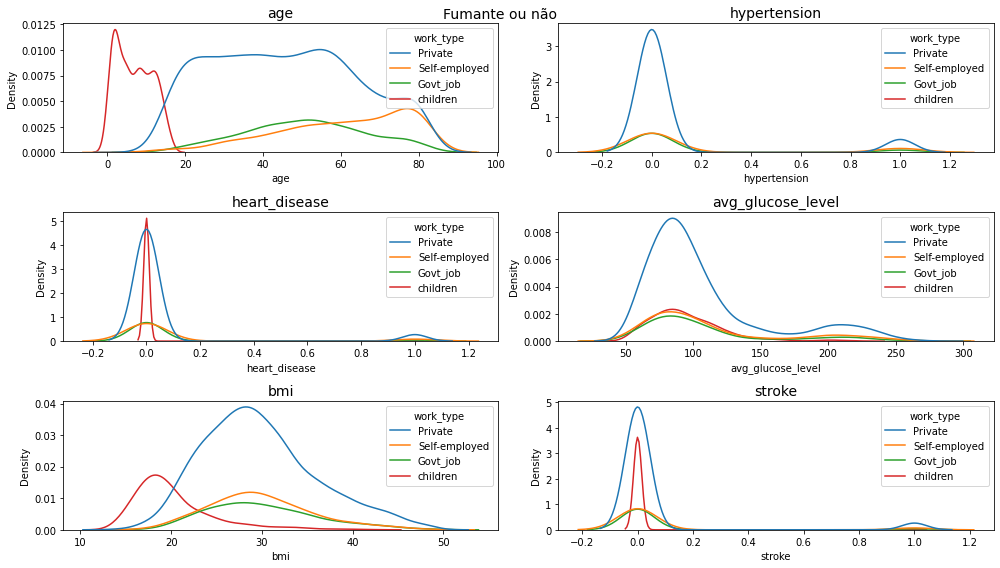

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(14,8))
for i, col in enumerate(num.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.kdeplot(x=num[col], hue=df['work_type'], ax=ax)
  plt.suptitle('Trabalho', fontsize=14)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

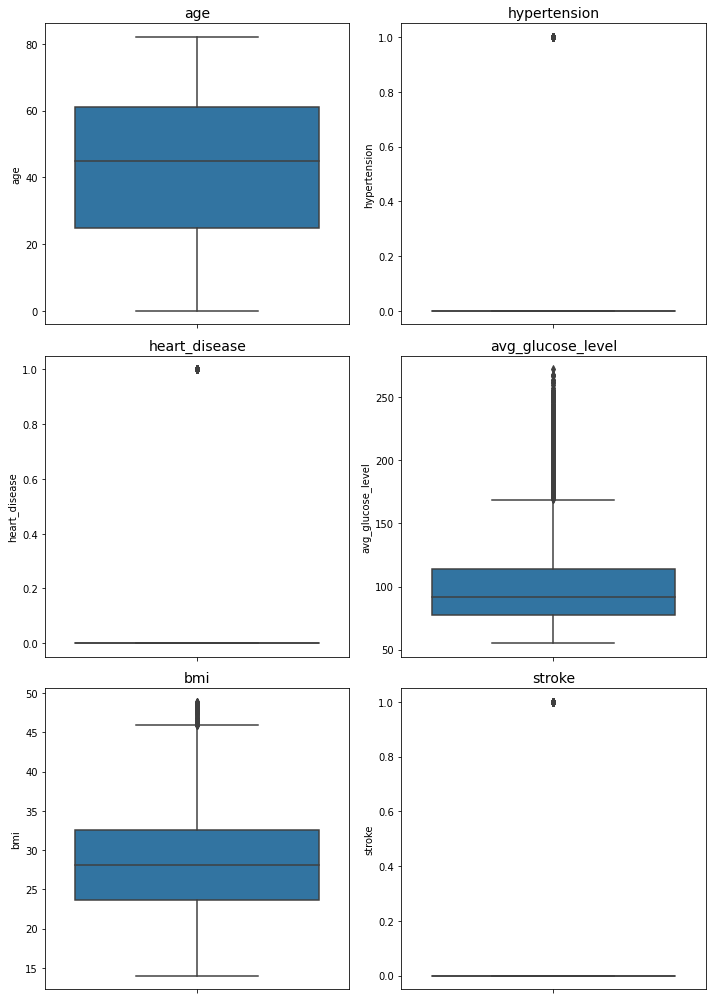

In [ ]:
num = df.select_dtypes(exclude='O')

plt.figure(figsize=(10,14))
for i, col in enumerate(num.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.boxplot(y=num[col], ax=ax)
  plt.title(col, fontsize=14)
plt.tight_layout()
plt.show()

## Analisando dados categóricos

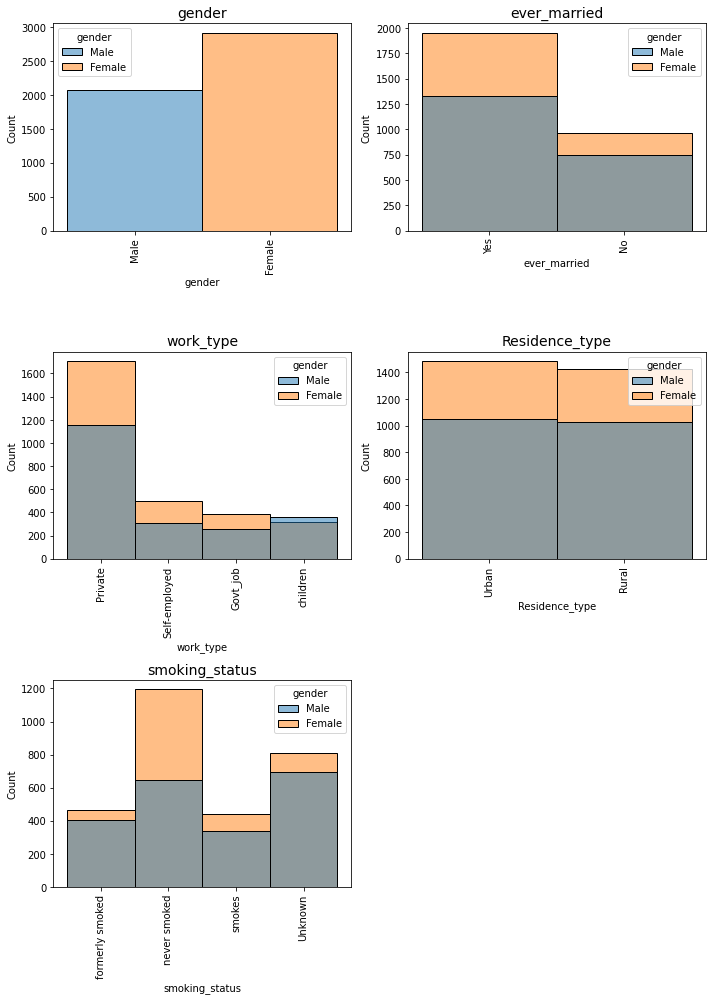

In [ ]:
cat = df.select_dtypes(include='O')

plt.figure(figsize=(10,14))
for i, col in enumerate(cat.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.histplot(x=cat[col], hue=df['gender'], ax=ax)
  plt.title(col, fontsize=14)
  plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

- O conjunto de dados é composto na maior parte por mulheres, que não fumam, que trabalham em empresas privadas, sendo casadas, e moram no ambiente urbano.

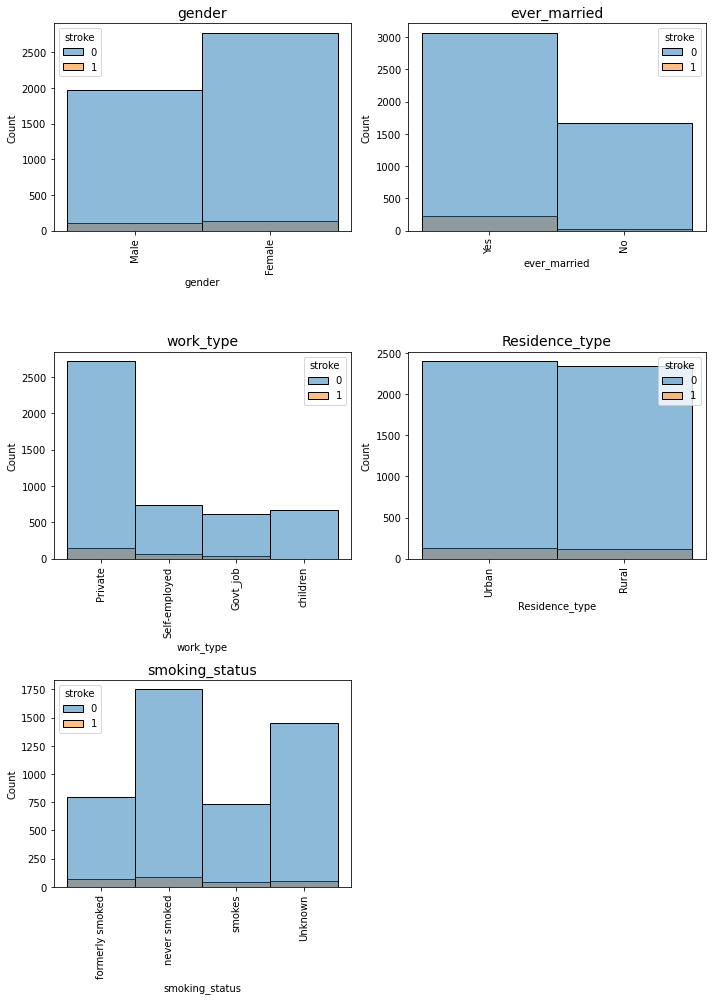

In [ ]:
cat = df.select_dtypes(include='O')

plt.figure(figsize=(10,14))
for i, col in enumerate(cat.columns):
  ax = plt.subplot(3,2, i + 1)
  sns.histplot(x=cat[col], hue=df['stroke'], ax=ax)
  plt.title(col, fontsize=14)
  plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

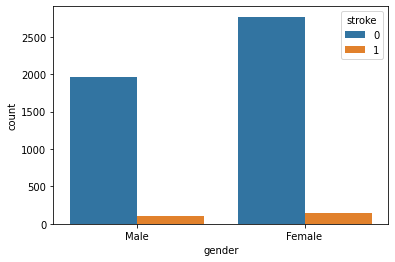

In [ ]:
sns.countplot(x=df['gender'], hue=df['stroke'])

- Como os dados da coluna 'Stroke' está desequilibrada, não temos um resultado conclusivo.
- Agora vou preparar os dados para adicioná-los nos modelos de classificação, e prever os acidentes vasculares cerebral.



# Preparando os dados

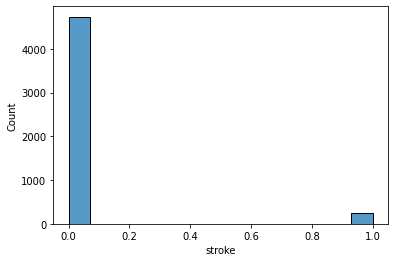

In [ ]:
sns.histplot(x=df['stroke'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

# ML
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
cat = df.select_dtypes(include='O')

df = pd.get_dummies(df, columns=[col for col in df.columns if col in cat])

In [ ]:
df.shape

(4981, 20)

In [ ]:
y = df.stroke
x = df.drop('stroke',axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
## pipeline 
under = RandomUnderSampler()
over = RandomOverSampler()

pipeline = Pipeline(steps=[('o', over),('u',under)])

x_train, y_train = pipeline.fit_resample(x_train,y_train)


In [ ]:
## função para receber o treino e teste nos modelos
def models_classifier(x_train,x_test,y_train,y_test, n):
  classifiers = {
      'SGDC':SGDClassifier(),
      'RIDGE':RidgeClassifier(),
      'RANDOM FOREST':RandomForestClassifier(n_estimators=n, criterion='entropy'),
      'DECISION TREE':DecisionTreeClassifier(),
      'GRADIENT':GradientBoostingClassifier(n_estimators=n),
      'ADA':AdaBoostClassifier(n_estimators=n),
      'EXTRA':ExtraTreesClassifier(n_estimators=n),
      'SVC':SVC(kernel='rbf'),
      'KNN':KNeighborsClassifier(n_neighbors=5)
  }
  modelos = []
  print('ESTIMATORS:',n)
  for nome, model in classifiers.items():
    print('->'*5,nome,'<-'*5)
    print()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Score Train:', model.score(x_train, y_train))
    print('Score Test:', model.score(x_test, y_test))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print()
    print(classification_report(y_test, y_pred))

    acc = nome, model.score(x_test, y_test)
    modelos.append(acc)
    tabela = pd.DataFrame(modelos, columns=['Models','Score'])
    print()
    print('-><-'*10)
    print()
  display(tabela.sort_values('Score',ascending=False))

In [ ]:
models_classifier(x_train,x_test, y_train, y_test, 10)

ESTIMATORS: 10
->->->->-> SGDC <-<-<-<-<-

Score Train: 0.768957345971564
Score Test: 0.7141424272818455
Confusion Matrix:
[[663 272]
 [ 13  49]]

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       935
           1       0.15      0.79      0.26        62

    accuracy                           0.71       997
   macro avg       0.57      0.75      0.54       997
weighted avg       0.93      0.71      0.79       997


-><--><--><--><--><--><--><--><--><--><-

->->->->-> RIDGE <-<-<-<-<-

Score Train: 0.7819905213270142
Score Test: 0.7352056168505516
Confusion Matrix:
[[679 256]
 [  8  54]]

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       935
           1       0.17      0.87      0.29        62

    accuracy                           0.74       997
   macro avg       0.58      0.80      0.56       997
weighted avg       0.94      0.74      0.80       997


-><--><--><--><--><--

,Models,Score
2,RANDOM FOREST,0.931795
6,EXTRA,0.927783
3,DECISION TREE,0.912738
8,KNN,0.858576
1,RIDGE,0.735206
7,SVC,0.731194
0,SGDC,0.714142
4,GRADIENT,0.697091
5,ADA,0.673019


In [ ]:
models_classifier(x_train,x_test, y_train, y_test, 50)

ESTIMATORS: 50
->->->->-> SGDC <-<-<-<-<-

Score Train: 0.5390995260663507
Score Test: 0.9127382146439318
Confusion Matrix:
[[903  32]
 [ 55   7]]

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       935
           1       0.18      0.11      0.14        62

    accuracy                           0.91       997
   macro avg       0.56      0.54      0.55       997
weighted avg       0.90      0.91      0.90       997


-><--><--><--><--><--><--><--><--><--><-

->->->->-> RIDGE <-<-<-<-<-

Score Train: 0.7819905213270142
Score Test: 0.7352056168505516
Confusion Matrix:
[[679 256]
 [  8  54]]

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       935
           1       0.17      0.87      0.29        62

    accuracy                           0.74       997
   macro avg       0.58      0.80      0.56       997
weighted avg       0.94      0.74      0.80       997


-><--><--><--><--><-

,Models,Score
2,RANDOM FOREST,0.934804
6,EXTRA,0.933801
3,DECISION TREE,0.914744
0,SGDC,0.912738
8,KNN,0.858576
4,GRADIENT,0.767302
1,RIDGE,0.735206
7,SVC,0.731194
5,ADA,0.719157
